In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 3.
# Climate models
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) netCDF file format / raster data
# (2) Visualization
# (3) Re-gridding
# (4) Multi-model ensembles

# We will work with datasets from CMIP6 archive; in the examples I will use the following cases:
#  ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc
#  ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
#  ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc

# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1ZEtDFYKhS_CEeYFzoe23vpDCIqR61bm5/view?usp=sharing

In [2]:
# * Bash
# ncdump, ncview
# nco: concatenate, time & space slicing, averaging

# * Python
# Explore with ncdump, netDCF4, scipy, xarray
# Visualization: pcolormesh, contour, other?
# Aggregate in space & time
# Re-gridding & multi-model ensemble

In [3]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [4]:
# Example 1
# Explore netCDF files using different methods

In [5]:
# Choice of file (model)

modfile='dati/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
#modfile='./ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'

#- extract model name

m_variable='dati/ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model=modfile[len(m_variable):-len(m_case)]


In [6]:
# Example 1a : ncdump (python script that mimics the command line tool) & netCDF4 library

from ncdump import ncdump
from netCDF4 import Dataset

# Read file with netCDF4 library

d1a = Dataset(modfile, 'r')

# Print attributes with ncdump function

nc_attrs, nc_dims, nc_vars = ncdump(d1a)

# Close

d1a.close()

NetCDF Global Attributes:
	Conventions: 'CF-1.7 CMIP-6.2'
	creation_date: '2018-07-11T07:36:33Z'
	tracking_id: 'hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45'
	description: 'CMIP6 historical'
	title: 'IPSL-CM6A-LR model output prepared for CMIP6 / CMIP historical'
	activity_id: 'CMIP'
	contact: 'ipsl-cmip6@listes.ipsl.fr'
	data_specs_version: '01.00.21'
	dr2xml_version: '1.11'
	experiment_id: 'historical'
	experiment: 'all-forcing simulation of the recent past'
	external_variables: 'areacella'
	forcing_index: 1
	frequency: 'mon'
	grid: 'LMDZ grid'
	grid_label: 'gr'
	nominal_resolution: '250 km'
	initialization_index: 1
	institution_id: 'IPSL'
	institution: 'Institut Pierre Simon Laplace, Paris 75252, France'
	license: 'CMIP6 model data produced by IPSL is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (https://creativecommons.org/licenses). Consult https://pcmdi.llnl.gov/CMIP6/TermsOfUse for terms of use governing CMIP6 output, incl

In [7]:
# Example 1b : netCDF4 (alone)

# Explore file with netCDF4 library

d1b = Dataset(modfile, mode='r')
print(d1b.variables.keys() )

# Imoprt data

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
mlons = d1b.variables['lon'][:]
mlats = d1b.variables['lat'][:]
mtime = d1b.variables['time'][:]
mts = d1b.variables['ts'][:,:,:]
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
d1b.close()

nlon=len(mlons)
nlat=len(mlats)
nmonths=len(mtime)

#- check dimensions
print('nlon=',nlon , '; nlat=',nlat , '; nmonths=',nmonths)
print(np.shape(mts)) # > we have a numpy array!


odict_keys(['lat', 'lon', 'time', 'time_bounds', 'ts'])
nlon= 144 ; nlat= 143 ; nmonths= 1980
(1980, 143, 144)


In [8]:
# Example 1c : scipy (only works with netCDF3 format)

# Using nco
# Conversion from netCDF4 to netCDF3 can be done in one of the following ways:
# nccopy -k nc3 foo4c.nc foo3.nc
# or
# ncks -3 foo4c.nc foo3.nc

from scipy.io import netcdf

# Import data
d1c = netcdf.netcdf_file('dati/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc','r')
#d1c = netcdf.netcdf_file('dati/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc3.nc','r')

#Look at the variables available
print(d1c.variables)

#Look at a specific variable's dimensions
print(d1c.variables['ts'].dimensions)   

#Look at a specific variable's units
print(d1c.variables['ts'].units) ## output is ('K')

TypeError: Error: dati/ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc is not a valid NetCDF 3 file

In [12]:
# Example 1d : xarray

import xarray as xr

#- Open file
d1d = xr.open_dataset(modfile)

#- Explore file
print(d1d)

#- extract variable (ts)
ts = d1d.ts  
print('\n','>>>>>>>>>>>>','\n',ts)


<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, time: 1980)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 87.46 88.73 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ts           (time, lat, lon) float32 ...
Attributes: (12/51)
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    ...                     ...
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://f

In [13]:
# Example 2
# Different ways of visualizing raster data (netCDF in this case)

# Let's work with the variable "ts" from the xarray import

# Explore its dimensions > lat/lon appear to contains grid cell limits
print(ts.lat)
print(ts.lon)
print(">"*80, ts.time)

<xarray.DataArray 'lat' (lat: 143)>
array([-90.      , -88.73239 , -87.46479 , -86.19718 , -84.92958 , -83.66197 ,
       -82.39436 , -81.12676 , -79.85915 , -78.59155 , -77.323944, -76.056335,
       -74.788734, -73.521126, -72.253525, -70.985916, -69.71831 , -68.45071 ,
       -67.1831  , -65.91549 , -64.64789 , -63.380283, -62.112675, -60.84507 ,
       -59.577465, -58.30986 , -57.042255, -55.774647, -54.507042, -53.239437,
       -51.971832, -50.704224, -49.43662 , -48.169014, -46.90141 , -45.633804,
       -44.366196, -43.09859 , -41.830986, -40.56338 , -39.295776, -38.028168,
       -36.760563, -35.492958, -34.225353, -32.957745, -31.690142, -30.422535,
       -29.15493 , -27.887323, -26.619719, -25.352112, -24.084507, -22.816902,
       -21.549295, -20.28169 , -19.014084, -17.746479, -16.478872, -15.211267,
       -13.943662, -12.676056, -11.408451, -10.140845,  -8.87324 ,  -7.605634,
        -6.338028,  -5.070423,  -3.802817,  -2.535211,  -1.267606,   0.      ,
         1.26760

(1980, 143, 144)


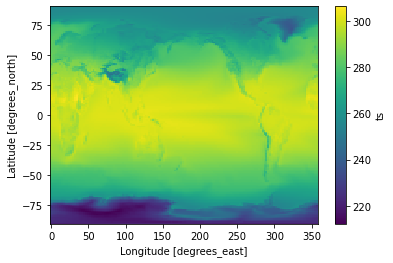

In [14]:
# Start with the quickest method
print(ts.shape)
ts.mean(axis=0).plot()

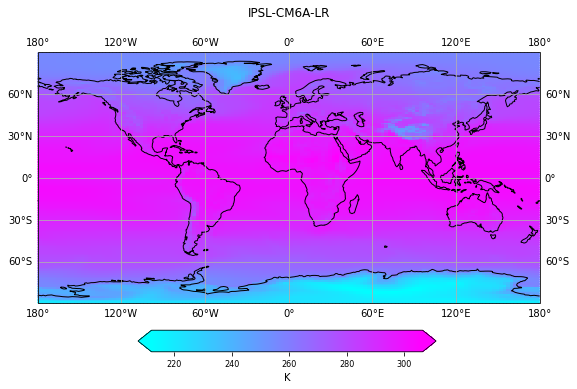

In [15]:
# We already tried pcolormesh (Module 1)

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(ts.lon, ts.lat, ts.mean(axis=0), \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label(ts.units)
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

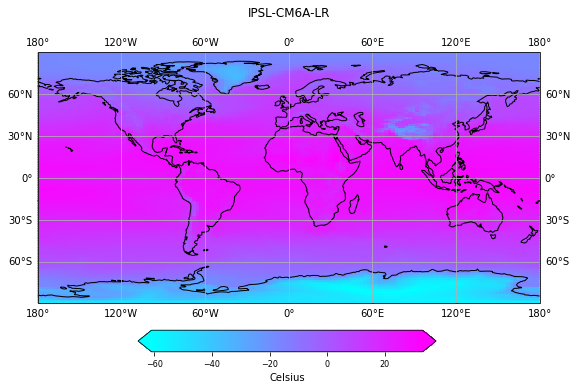

In [16]:
#- add cyclic point form plotting purposes

from cartopy.util import add_cyclic_point
ts_avg_cyc, lon_cyc = add_cyclic_point(ts.mean(axis=0)-273.15, coord=ts.lon)  # also Kelvin to Celsius

# re-plot

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts.lat, ts_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()


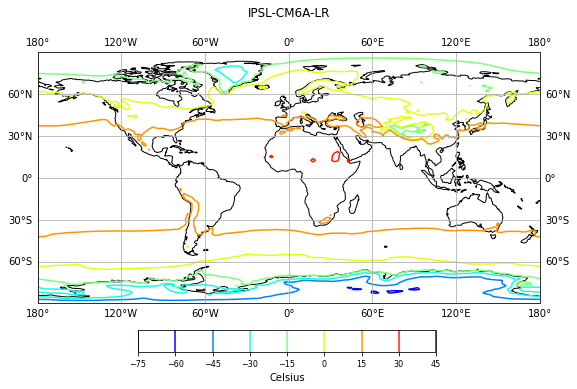

In [17]:
# Contour plot

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.contour(lon_cyc, ts.lat, ts_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.jet ) 

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  app.launch_new_instance()


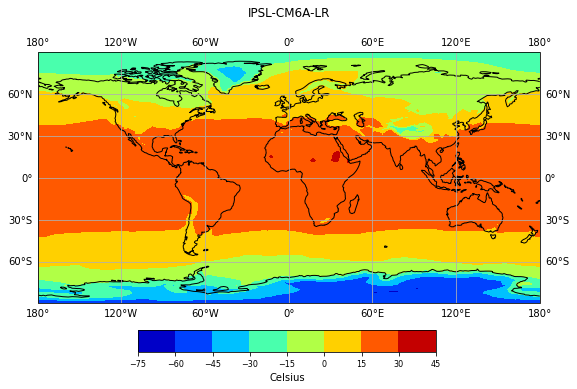

In [18]:
# Filled contour plot

fig = plt.figure(figsize=(9,6))  # x,y(inches)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.contourf(lon_cyc, ts.lat, ts_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.jet )   # Kelvin to Celsius

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

In [19]:
# Example 3
# Regridding

# Let's assume I want to compare the output of two different model simulations, 
# in terms of the spatial faetures of surface temperature.
# However, these two models use different horizontal grids.
# >> I need spatial interpolation to a common grid >> regridding

# https://climatedataguide.ucar.edu/climate-data-tools-and-analysis/regridding-overview

# https://stackoverflow.com/questions/25544110/regridding-regular-netcdf-data
# http://xarray.pydata.org/en/stable/interpolation.html#example

# I will proceed using xarray

<xarray.DataArray 'ts' (time: 1980, lat: 160, lon: 320)>
[101376000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    original_name:  TGEF
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-02-20T02:26:51Z altered by CMOR: replaced missing va...


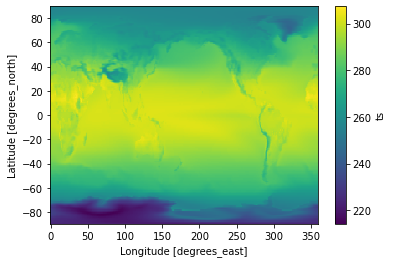

In [20]:
# My first model is the one used above (IPSL-CM6A-LR)
# We had: nlon= 144 ; nlat= 143 ; nmonths= 1980

# Let's get the tempertaure from a second model

#- extract model name
modfile2='dati/ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'
#modfile2='./ts_Amon_BCC-ESM1_historical_r1i1p1f1_gn_185001-201412.nc'

m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model2=modfile2[len(m_variable):-len(m_case)]

#- Open file
m2 = xr.open_dataset(modfile2)

#- extract variable (ts)
ts2 = m2.ts  
print(ts2)

ts2.mean(axis=0).plot()

<xarray.DataArray 'ts' (time: 1980, lat: 143, lon: 144)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [245.73902345, 245.57065569, 245.48882461, ..., 246.13415219,
         246.04353986, 245.93849864],
        [247.57779506, 247.33054597, 247.08824457, ..., 248.07459169,
         247.94216867, 247.7312585 ],
        ...,
        [237.04189324, 237.22480812, 237.41826409, ..., 236.54170018,
         236.69725928, 236.86743371],
        [237.27861144, 237.36021461, 237.44311342, ..., 237.03368789,
         237.12039358, 237.20186817],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [230.53281621, 230.50257754, 230.39773794, ..., 230.79638316,
         230.73595043, 230.65189109],
        [231.85647372, 231.6554634 , 231.47025171, ..., 232.4927

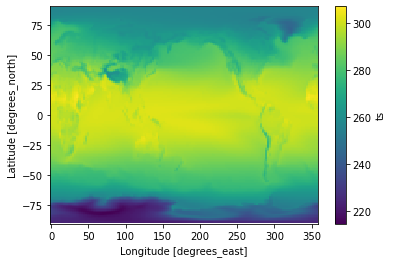

In [21]:
# Apply regridding

ts2i = ts2.interp(lat=ts.lat, lon=ts.lon, method='linear')

# Compare to original

print(ts2i)
ts2i.mean(axis=0).plot()

<xarray.DataArray 'ts' (time: 1980, lat: 143, lon: 144)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [245.14754, 244.96333, 244.79541, ..., 245.40535, 245.52846,
         245.29578],
        [248.38481, 248.14142, 247.73196, ..., 248.80467, 248.81815,
         248.3934 ],
        ...,
        [236.9249 , 237.14641, 237.36205, ..., 236.31053, 236.54236,
         236.72212],
        [237.34698, 237.40213, 237.44473, ..., 237.18832, 237.26346,
         237.30112],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [230.0206 , 230.04417, 229.90875, ..., 230.14589, 230.22154,
         230.13081],
        [232.2917 , 232.05176, 231.81895, ..., 233.15598, 232.8017 ,
         232.50346],
...
        [260.11853, 260.32724, 260.5978 , ..., 259.46527, 259.7242 ,
         259.92465],
        [259.28674, 259.

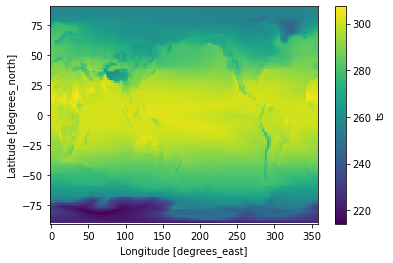

In [22]:
# Apply regridding

ts2in = ts2.interp(lat=ts.lat, lon=ts.lon, method='nearest')

# Compare to original

print(ts2in)
ts2in.mean(axis=0).plot()

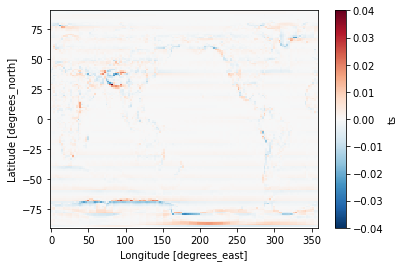

In [23]:
# Compare the bilinear and nearest neighbour methods

intdiff = (ts2in.mean(axis=0)-ts2i.mean(axis=0))/ts2i.mean(axis=0)   # relative difference
intdiff.plot()

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  shading=shading)


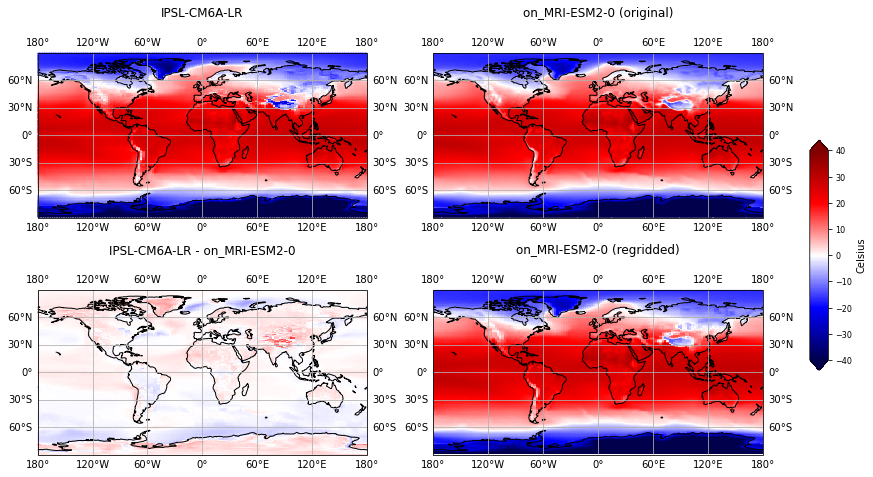

In [24]:
# Now compare the two models

# Switch from Kelvin to Celsius degrees

ts_avg=ts.mean(axis=0)-273.15
ts2_avg=ts2.mean(axis=0)-273.15
ts2i_avg=ts2i.mean(axis=0)-273.15

# Set plot

fig = plt.figure(figsize=(13,8))  # x,y(inches)

subplots = (2,2)
n_panels = subplots[0] * subplots[1]

# I will use the same colormap and scale for all plots, to facilitate comparison.
# Because we will also show the difference, we want this scale to be symmetric about zero

tmax = 40
norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax) 
cmap = mpl.cm.seismic

# Model 1

ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts.lat, ts_avg, \
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)


# Model 2 (orig)

ax = fig.add_subplot(subplots[0], subplots[1], 2, projection=ccrs.PlateCarree())
ax.set_title(''.join([model2,' (original)\n']))
ax.set_global()
mm = ax.pcolormesh(ts2.lon, ts2.lat, ts2_avg, \
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)

# Model 2 (regr)

ax = fig.add_subplot(subplots[0], subplots[1], 4, projection=ccrs.PlateCarree())
ax.set_title(''.join([model2,' (regridded)\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts.lat, ts2i_avg, \
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)


# Model 1 - Model 2 (regr)

tsdiff_avg = (ts2i_avg-ts_avg)  # absolute difference
tsdiff_avg_cyc, lon_cyc = add_cyclic_point(tsdiff_avg, coord=ts.lon) 

ax = fig.add_subplot(subplots[0], subplots[1], 3, projection=ccrs.PlateCarree())

ax.set_title(''.join([model,' - ',model2,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts.lat, tsdiff_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)


#- add colorbar
cbar_ax = fig.add_axes([0.95, 0.30, 0.02, 0.40]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='vertical')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

In [26]:
# Exercise 1
# Multi-model ensemble

# Now let's consider 3 model simulations of surface temperatures for the historical period 1850-2014, 
#  in particlar the average temperature over the entire period.
# Plot the multi-model ensemble average surface temperature map, 
#  as well as a map showing the standard deviation of the ensemble

In [37]:
modfile4='dati/ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc'
modfile3='dati/ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc'

In [39]:
m5 = xr.open_mfdataset([modfile3, modfile4])

In [40]:
ts5 = m5.ts  

In [41]:
ts5 

<xarray.DataArray 'ts' (time: 1980, lat: 128, lon: 256)>
dask.array<concatenate, shape=(1980, 128, 256), dtype=float32, chunksize=(1200, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    original_name:  GRTS
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2018-11-30T16:15:08Z altered by CMOR: replaced missing va...

In [30]:
ts5 = ts5.interp(lat=ts.lat, lon=ts.lon, method='linear')

In [31]:
ts5_mean = ts5.mean(axis=0) - 273.15

In [35]:
ts5_mean

<xarray.DataArray 'ts' (lat: 143, lon: 144)>
dask.array<sub, shape=(143, 144), dtype=float32, chunksize=(143, 144), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [ ]:
mean_ensamble = np.mean( np.array([ ts2i_avg, ts_avg, ts5_mean ]), axis=0 )
std_ensamble = np.std( np.array([ ts2i_avg, ts_avg, ts5_mean ]), axis=0 )

/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/Users/christianuccheddu/opt/anaconda3/envs/environment/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, 

In [43]:
(np.array([ ts2i_avg, ts_avg])).shape

(2, 143, 144)

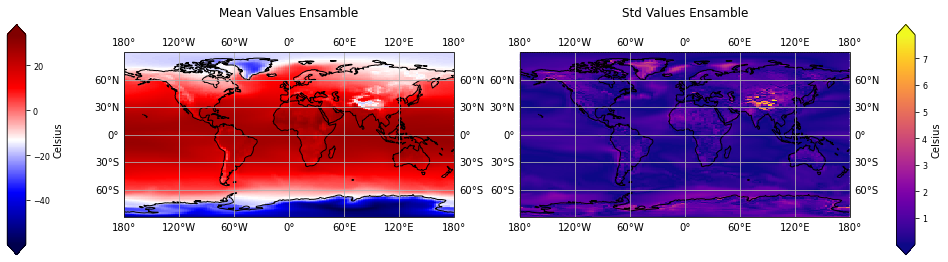

In [107]:
fig = plt.figure(figsize=(13,8))  # x,y(inches)

subplots = (2,2)
n_panels = subplots[0] * subplots[1]

# I will use the same colormap and scale for all plots, to facilitate comparison.
# Because we will also show the difference, we want this scale to be symmetric about zero

tmax = 40
#norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax) 
cmap1 = mpl.cm.seismic
cmap2 = mpl.cm.plasma

# Model 1

ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.PlateCarree())
ax.set_title('Mean Values Ensamble\n')
ax.set_global()
mm = ax.pcolormesh(ts2i_avg.lon, ts2i_avg.lat, mean_ensamble, \
                   transform=ccrs.PlateCarree(),cmap=cmap1)  
ax.coastlines()
ax.gridlines(draw_labels=True)

cbar_ax = fig.add_axes([0, 0.5, 0.02, 0.40]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='vertical')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

# Model 2 (orig)

ax = fig.add_subplot(subplots[0], subplots[1], 2, projection=ccrs.PlateCarree())
ax.set_title("Std Values Ensamble\n")
ax.set_global()
mm = ax.pcolormesh(ts2i_avg.lon, ts2i_avg.lat, std_ensamble, \
                   transform=ccrs.PlateCarree(),cmap=cmap2 )  
ax.coastlines()
ax.gridlines(draw_labels=True)


#- add colorbar
cbar_ax = fig.add_axes([0.95, 0.5, 0.02, 0.40]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='vertical')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)